# 추가 선택과제  (NLP, 워드 클라우드)

## NLP 이용해보기

In [8]:
import pandas as pd
import numpy as np
import re
import nltk
from textblob import TextBlob
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess
df = pd.read_csv("netflix_reviews.csv")  # 파일 불러오기
df = df.iloc[:,0:5]

In [9]:
def preprocess_text(text):
    if isinstance(text, float):
        return ""
    text = text.lower()  # 대문자를 소문자로
    text = re.sub(r'[^\w\s]', '', text)  # 구두점 제거
    text = re.sub(r'\d+', '', text)  # 숫자 제거
    text = text.strip()  # 띄어쓰기 제외하고 빈 칸 제거
    return text

df['reviewId'] = df['reviewId'].apply(preprocess_text)
df['userName'] = df['userName'].apply(preprocess_text)
df['content'] = df['content'].apply(preprocess_text)


In [10]:
# 감성 분석을 위한 함수
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [13]:
df['sentiment'] = df['content'].apply(get_sentiment)  # (DIY) apply를 사용하여 감성 분석을 해보세요. 필수 텍스트가 전처리되어있어야 합니다.
# df에 sentiment 값을 적용을 먼저 하시고, 아래와 같이 긍정과 부정을 분류하세요.
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0.1 else ('negative' if x < -0.1 else 'neutral'))
df[['content', 'score', 'sentiment_label']]

,content,score,sentiment_label
0,great app on the move i can watch my movies a...,5,positive
1,good,5,positive
2,need to improve and to update some error durin...,3,neutral
3,netflix is a nice appbut not all the movies ar...,3,neutral
4,not much availability considering options on w...,3,neutral
...,...,...,...
117129,i really like it there are so many movies and ...,5,positive
117130,i love netflix i always enjoy my time using it,5,positive
117131,sound quality is very slow of movies,1,neutral
117132,rate is very expensive bcos we see netflix sun...,1,negative


## wordcloud 이용해보기

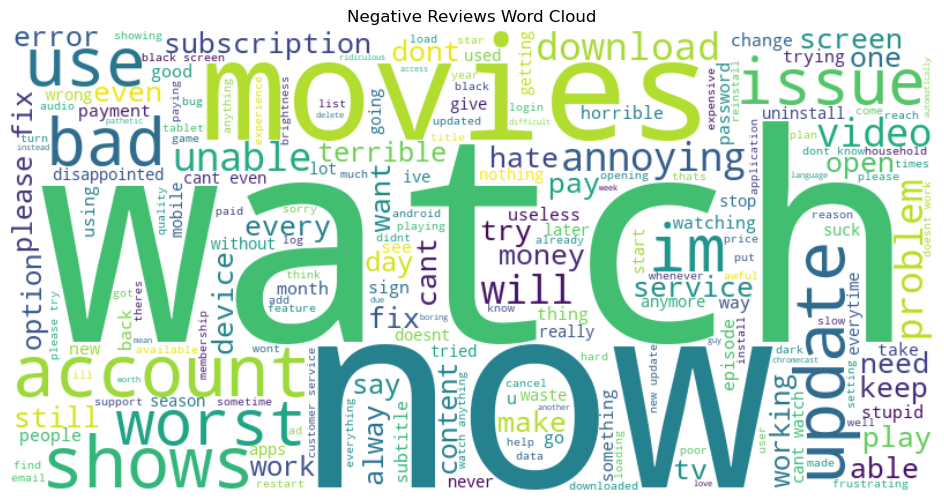

In [20]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
# (선택) 불용어를 먼저 제거해주세요.
stopwords = set(STOPWORDS)
stopwords.update(['netflix', 'movie', 'show', 'time', 'app', 'series', 'phone'])  # 리뷰에서 필요없는 단어는 여기 안에 추가하셔도 좋습니다.

# 부정적인 리뷰만 필터링
negative_reviews = df[df['sentiment_label'] == 'negative']['content'].tolist()  # 부정적인 리뷰를 리스트로 변환
negative_reviews = ' '.join(negative_reviews)  # 부정적인 리뷰 리스트를 하나의 문자열로 결합

# 부정적인 리뷰만 먼저 모아본 다음, 아래처럼 wordcloud를 그려보세요
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(negative_reviews)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud')
plt.show()